# Analysis of Why Patients Miss Their Scheduled Medical Appointments

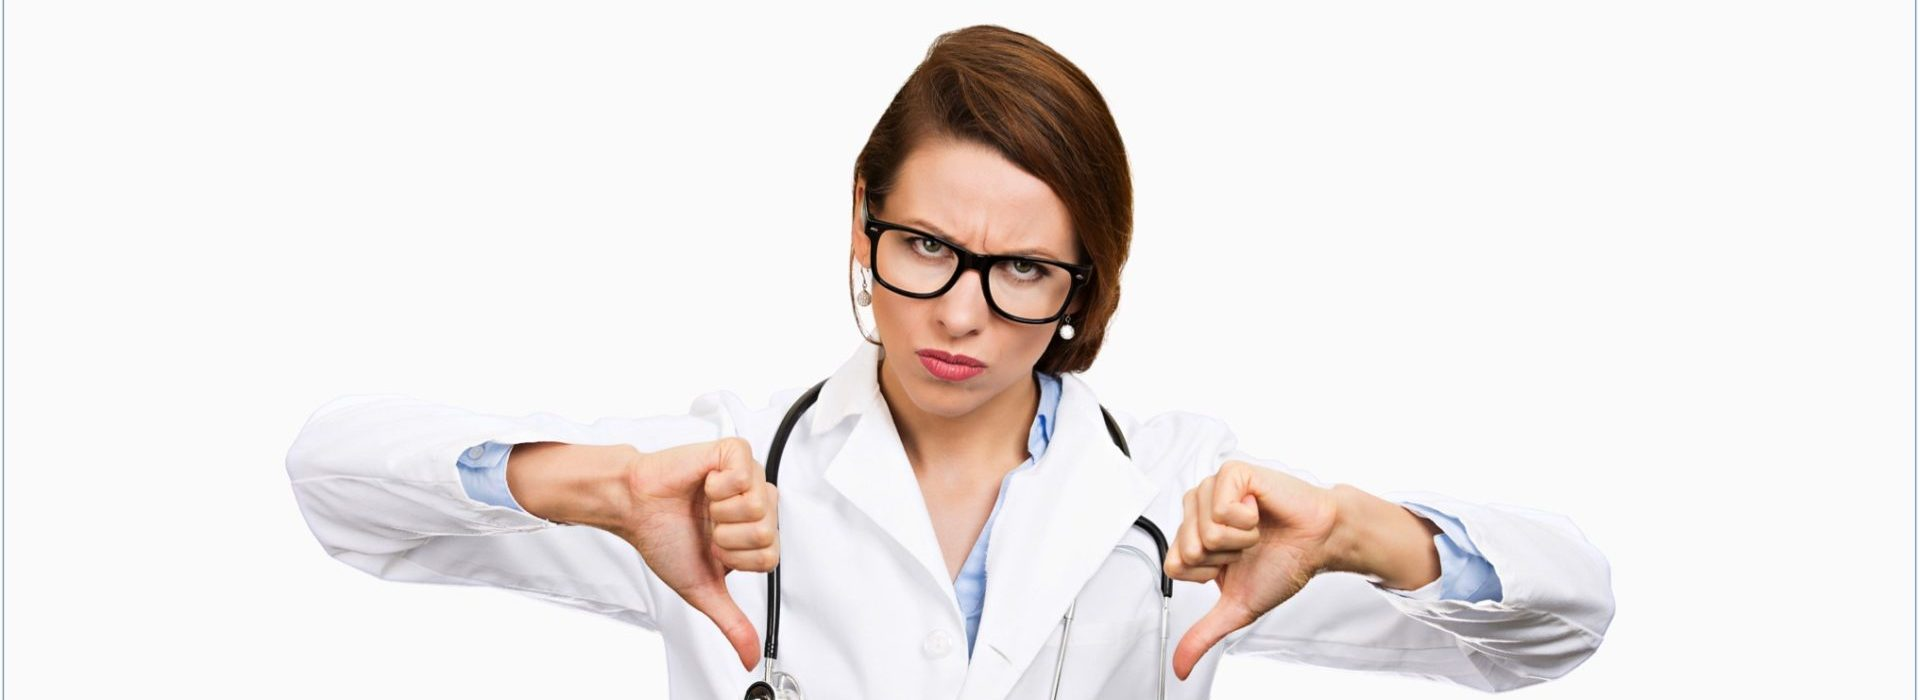

## Reza Ameli, Kevin Do, Richard Do

### CMSC320 Final Tutorial Fall 2019

## Introduction

We live in a busy world where we all have many things to worry about on a daily basis, so it is very easy for us to forget about something planned in our day since medical appointments are made months in advance. Our day to day routines usually just kick in without us even noticing, so when there is something that was planned months ago, it easy to be lost in the jumble of things that is our daily agenda.

The purpose of this project is to figure out whether there is way to predict if there was a way to predict if someone were to not show up to a medical appointment. This could prove beneficial, so that medical offices would be able to possibly determine how likely a patient will show up or not depending on certain characteristics derived from the data. As a result, medical offices would be able to remove or reschedule the appointments for those who didn't show up and possibly fit in appointments for patients who they know will show up.

## Working with the Data: Data Curation, Parsing and Management
We first import all the libraries that we need to work with the data which include: pandas, numpy, matplotlib and more.

We also installed Google Translate because the data was from Brazil

In [1]:
# Necessary libraries and imports to complete this tutorial
!pip install googletrans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from googletrans import Translator
from datetime import datetime

## Reading the Data

In [2]:
appts = pd.read_csv("noshowappts.csv", sep=',')
appts.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From the medical appointments dataset we got 14 columns which consisted of:
+ PatientId
+ AppointmentID
+ Gender
+ ScheduledDay (DataMarcacaoSonsulta)
+ AppointmentDay (DataAgendamento)
+ Age
+ Neighbourhood
+ [Scholarship](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
+ Hipertension
+ Diabetes
+ Alcoholism
+ Handcap
+ SMS_received
+ No-show

The columns should all be obvious and the 1s and 0s for certain categories represent true or false values while the only topic that may need an explanation is Scholarship where a link is provided for more information.

In [3]:
#Translating Neighborhoods if needed
"""sample = appts.sample(n = 1000)
counter = 0
neighborhoods = []
translator = Translator()

for index, row in sample.iterrows():
    if counter > 250:
        # REINITIALIZE THE API
        translator = Translator()
        counter = 0
    try:
        counter += 1
        # translate the 'text' column
        translated = translator.translate(row['Neighbourhood'], src='es', dest='en')
    except Exception as e:
        print(str(e))
        continue
    neighborhoods.append(translated.text)

sample['Neighborhood'] = neighborhoods
sample.head()"""

"sample = appts.sample(n = 1000)\ncounter = 0\nneighborhoods = []\ntranslator = Translator()\n\nfor index, row in sample.iterrows():\n    if counter > 250:\n        # REINITIALIZE THE API\n        translator = Translator()\n        counter = 0\n    try:\n        counter += 1\n        # translate the 'text' column\n        translated = translator.translate(row['Neighbourhood'], src='es', dest='en')\n    except Exception as e:\n        print(str(e))\n        continue\n    neighborhoods.append(translated.text)\n\nsample['Neighborhood'] = neighborhoods\nsample.head()"

## Tidying and Modifying the Data
We can remove the PatientID, AppointmentID and Neighbourhood columns since we will not be needing the values from that data since they provide no useful information for the purposes of this tutorial.

However, the sections that we do care about the rest of the information within the dataframe, so we are going to leave the rest of the columns untouched. We went ahead and created two more columns in the dataframe to determine which season the appointment was scheduled and which season the appointment was supposed to take place. We did this to see whether patients were more likely to miss an appointment during a certain season as opposed to another one.

In [4]:
#tidying data
appts = appts.drop(columns=['PatientId', 'AppointmentID', 'Neighbourhood'])
sch_datetimes = []
appt_datetimes = []
sch_seasons = [] 
appt_seasons = []

def calc_season(season):
    if season == 1:
        return "Winter"
    elif season == 2:
        return "Spring"
    elif sch_season == 3:
        return "Summer"
    elif season == 4:
        return "Autumn"
    else:
        return "Unknown"

for index, row in appts.iterrows():
    sch_date = datetime.strptime(row['ScheduledDay'], "%Y-%m-%dT%H:%M:%SZ")
    appt_date = datetime.strptime(row['AppointmentDay'], "%Y-%m-%dT%H:%M:%SZ")
    
    sch_month = sch_date.month
    appt_month = appt_date.month
    sch_season = (sch_month%12 + 3)//3
    appt_season = (appt_month%12 + 3)//3
    
    sch_seasons.append(calc_season(sch_season))
    appt_seasons.append(calc_season(appt_season))
    
    sch_datetimes.append(datetime(sch_date.year, sch_date.month, sch_date.day, 
                                  sch_date.hour, sch_date.minute, sch_date.second))
    appt_datetimes.append(datetime(appt_date.year, appt_date.month, appt_date.day, 
                                   appt_date.hour, appt_date.minute, appt_date.second))

appts['ScheduledDay'] = sch_datetimes
appts['AppointmentDay'] = appt_datetimes
appts['ScheduledSeason'] = sch_seasons
appts['AppointmentSeason'] = appt_seasons
appts.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledSeason,AppointmentSeason
0,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,No,Spring,Spring
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,No,Spring,Spring
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,No,Spring,Spring
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,No,Spring,Spring
4,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,No,Spring,Spring


Now that we have all the columns that we want, we can move forward with our EDA!

## Exploratory Data Analysis

## Hypothesis Testing and Machine Learning

## Conclusion